## Question 2

Analysing on how external factors influence fresh fruit bunch (FFB) yield.

----------

First of all we need to import necessary libraries to investigate the data and present solutions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

Importting the dataset from folder Data/palm_ffb.csv - 
Since it is a .csv file we can use read_csv method to get pandas DataFrame

In [41]:
palmFFB = pd.read_csv('Data/palm_ffb.csv')
palmFFB.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


## Exploratory Data Analysis
This part is a key to explore the data

In [3]:
# Finding out datatypes and if any of the columns iclude null values
palmFFB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [4]:
# Finding the total number of null values:
palmFFB.isnull().sum()

Date             0
SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64

All of the rows include a non-null value thus there is no need for Data cleaning approaches (interpolations or dropping null rows)

In [5]:
# Now we finding statistical features of each variable (Additives)
palmFFB.describe() # method to find statistical features

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [6]:
# Finding the correlation of the components
palmFFB.corr()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,1.000000,-0.649878,0.015839,-0.499936,0.552001,-0.057015,-0.326539,-0.003183
Average_Temp,-0.649878,1.000000,0.180396,0.761083,-0.369386,0.076321,0.446515,-0.005494
Min_Temp,0.015839,0.180396,1.000000,-0.124754,0.345944,0.068414,0.024396,0.103830
Max_Temp,-0.499936,0.761083,-0.124754,1.000000,-0.461117,-0.039112,0.314827,-0.071201
Precipitation,0.552001,-0.369386,0.345944,-0.461117,1.000000,0.127897,-0.265866,0.289604
Working_days,-0.057015,0.076321,0.068414,-0.039112,0.127897,1.000000,0.048876,0.116364
HA_Harvested,-0.326539,0.446515,0.024396,0.314827,-0.265866,0.048876,1.000000,-0.350222
FFB_Yield,-0.003183,-0.005494,0.103830,-0.071201,0.289604,0.116364,-0.350222,1.000000


### In order to visualize the correlation we can use Heatmap which is a feature in Seaborn library

Text(122.09375, 0.5, 'External Factors')

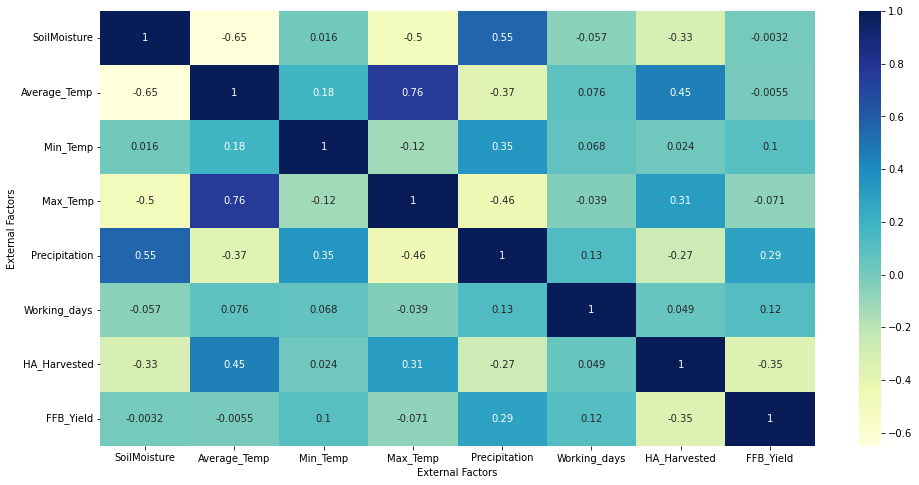

In [7]:
plt.figure(figsize=(16,8))
sns.heatmap(palmFFB.corr(),annot=True, cmap="YlGnBu")
plt.xlabel('External Factors')
plt.ylabel('External Factors')

Since heatmap visualized the correlation of external factors now we can better understand the impact each factor has to each other: High positive (if one increase the other will probably increase two) -  High negative (if one increase the other additives will probably decrease)

For example:

#### SoilMoisture: 
High positive correlation with Percipitation , High negative correlation with Average_Temp and Max Temp 

#### HA_Harvested:
High positive correlation with Average_Temp, Negative correlation with SoilMoisture



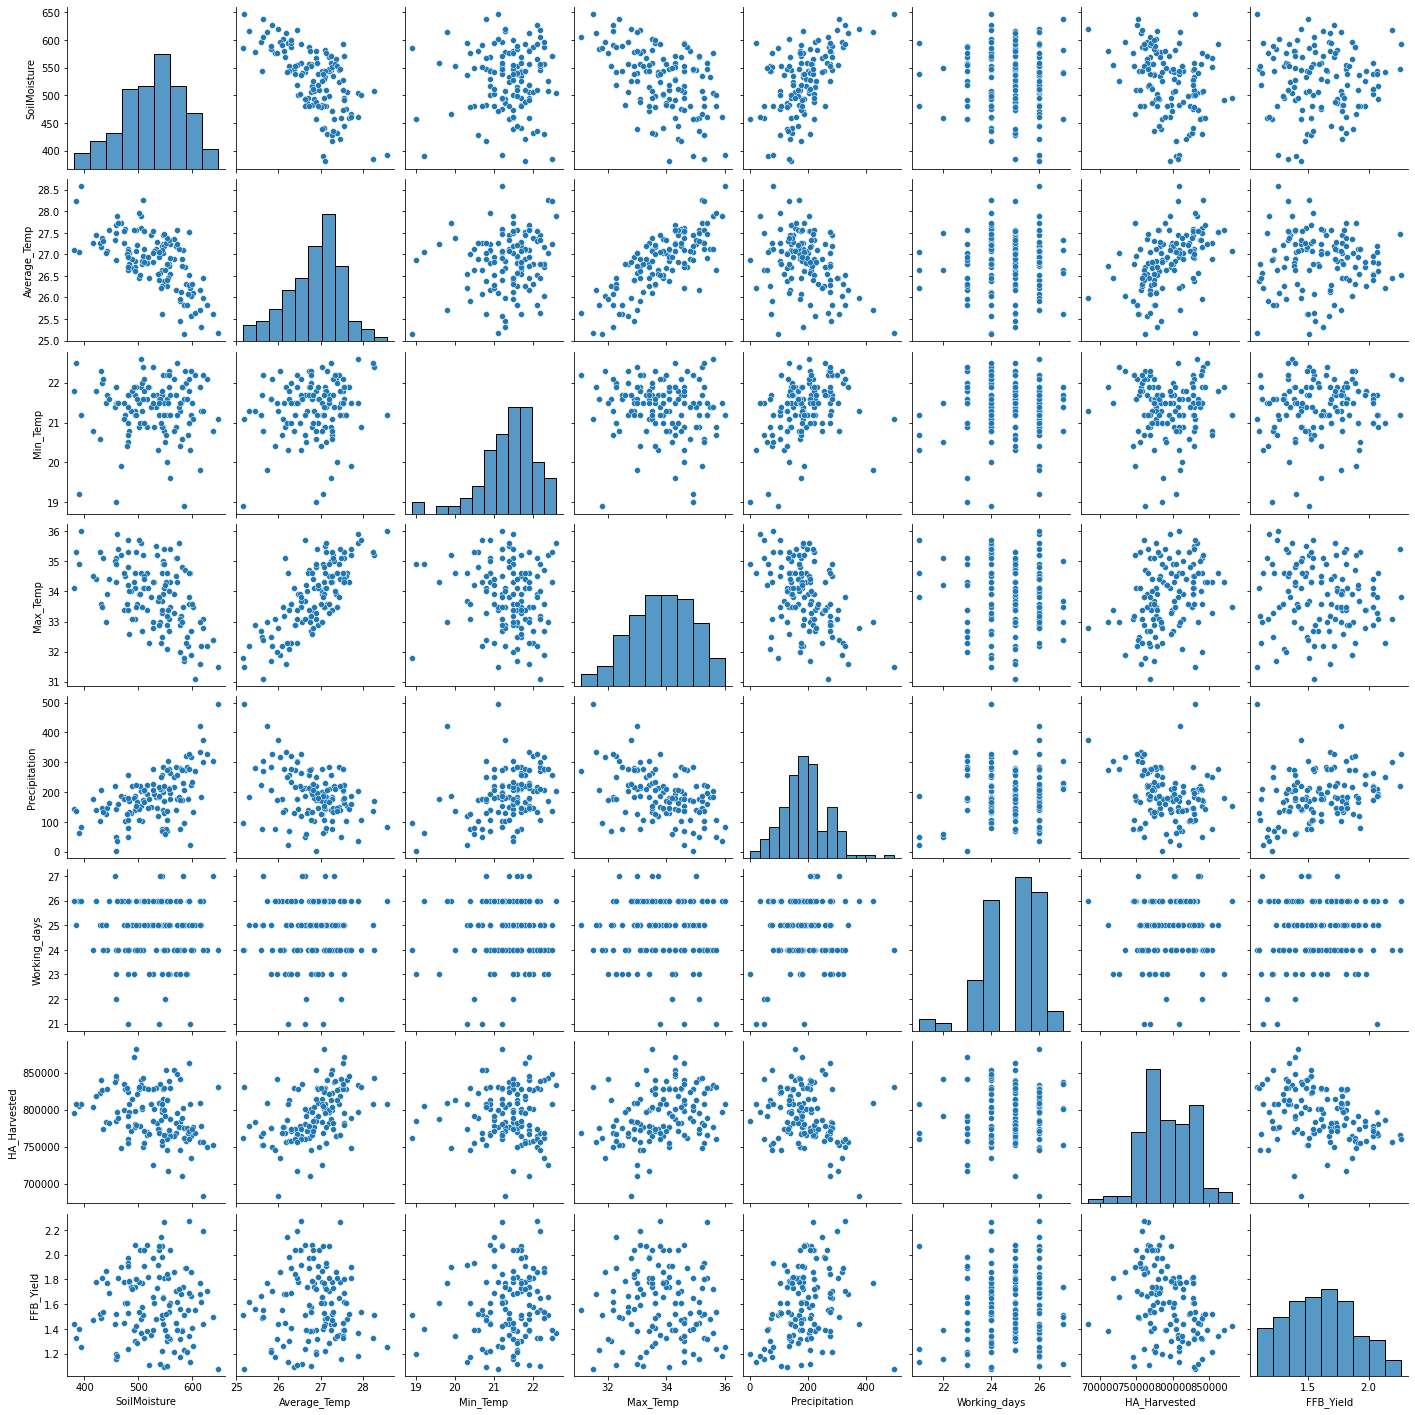

In [9]:
sns.pairplot(palmFFB)

So far we know that variable: Date and Working days have different types. 
To analyze these two features we need to take some actions:
#### Date:
Deep diving into the Date to further analyze it requires to break it into its smaller components, day, month and year.

#### Working Days:
This could help us to further analyze the normal working day in a month. 

For both of the features, Histogram (counting plot) which shows the population for each category of choice is a suitable approach.

In [42]:
palmFFB['Date'] = pd.to_datetime(palmFFB['Date'],format="%d.%m.%Y",dayfirst=True)
palmFFB['Year'] = pd.DatetimeIndex(palmFFB['Date']).year
palmFFB['Month'] = pd.DatetimeIndex(palmFFB['Date']).month
palmFFB['Day'] = pd.DatetimeIndex(palmFFB['Date']).day
palmFFB

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,Year,Month,Day
0,2008-01-01,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62,2008,1,1
1,2008-02-01,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45,2008,2,1
2,2008-03-01,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56,2008,3,1
3,2008-04-01,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39,2008,4,1
4,2008-05-01,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44,2008,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
125,2018-06-01,498.2,27.213333,21.6,33.6,165.6,24,820758.9147,1.29,2018,6,1
126,2018-07-01,494.7,27.074194,21.2,33.5,154.7,26,882254.2254,1.42,2018,7,1
127,2018-08-01,478.8,27.016129,20.4,33.6,127.2,25,829488.8199,1.61,2018,8,1
128,2018-09-01,481.1,26.946667,21.0,34.2,180.6,23,792101.0471,1.91,2018,9,1


We used pandas to convert our date which was object type into datetime type

In [15]:
palmFFB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           130 non-null    datetime64[ns]
 1   SoilMoisture   130 non-null    float64       
 2   Average_Temp   130 non-null    float64       
 3   Min_Temp       130 non-null    float64       
 4   Max_Temp       130 non-null    float64       
 5   Precipitation  130 non-null    float64       
 6   Working_days   130 non-null    int64         
 7   HA_Harvested   130 non-null    float64       
 8   FFB_Yield      130 non-null    float64       
 9   Year           130 non-null    int64         
 10  Month          130 non-null    int64         
 11  Day            130 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(4)
memory usage: 12.3 KB


In [17]:
palmFFB['Year'].count()

130

<AxesSubplot:xlabel='count', ylabel='Day'>

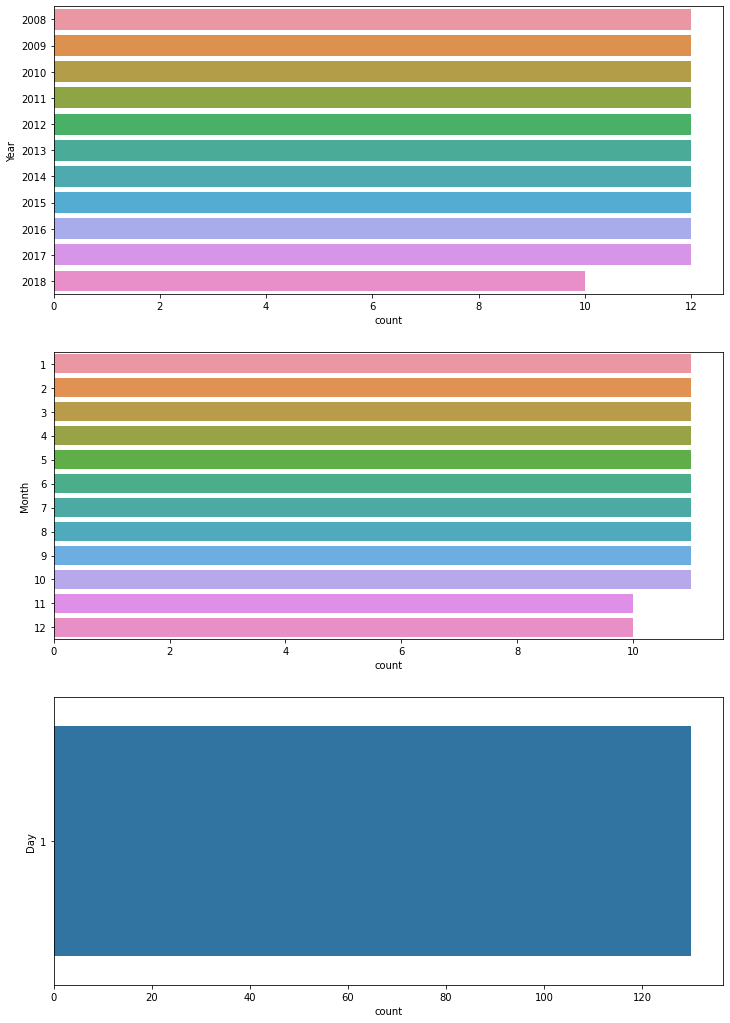

In [54]:
fig = plt.figure(figsize=(12,18))
plt.subplot(311)
sns.countplot(y = palmFFB['Year'])
plt.subplot(312)
sns.countplot(y = palmFFB['Month'])
plt.subplot(313)
sns.countplot(y = palmFFB['Day'])

It is figured out that the records contains data for the first day of every month starting form year 2008 to 2018 (Until the month 10)

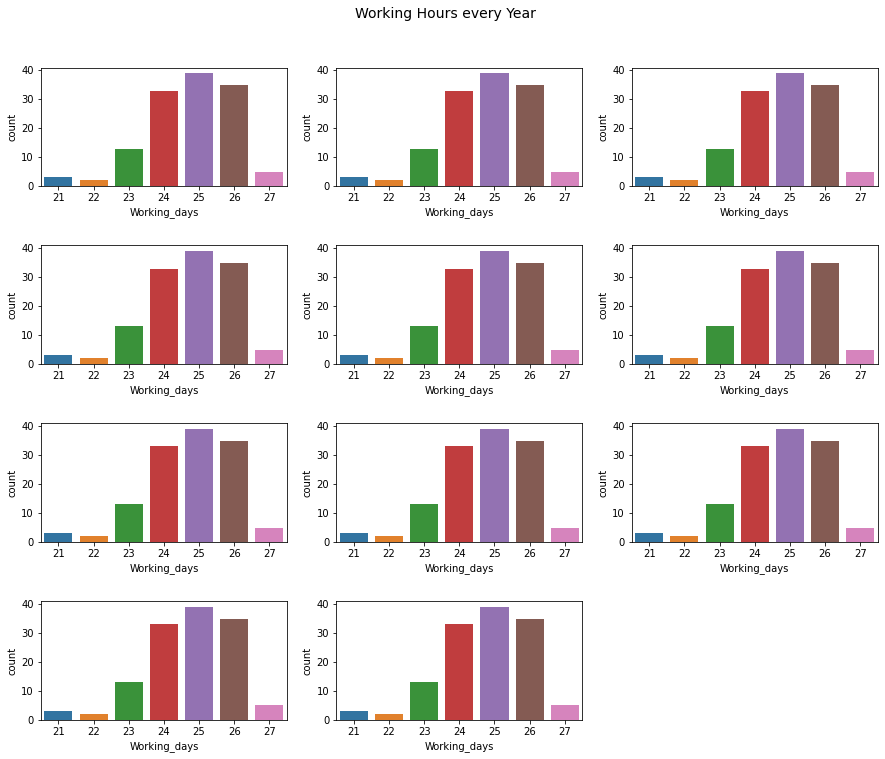

In [74]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Working Hours every Year", fontsize = 14, y = 0.95)

yearly = palmFFB['Year'].unique()
for n,yearly in enumerate(yearly):
    ax = plt.subplot(4,3,n+1)
    sns.countplot(x = palmFFB['Working_days'], data = palmFFB[palmFFB['Year'] == yearly])

It can be concluded that based on the distribution of the working days, 25 days is the highest number of working days. (It can also be realized that it is normally distributed.)

Let's check if there are any outliers:

<AxesSubplot:>

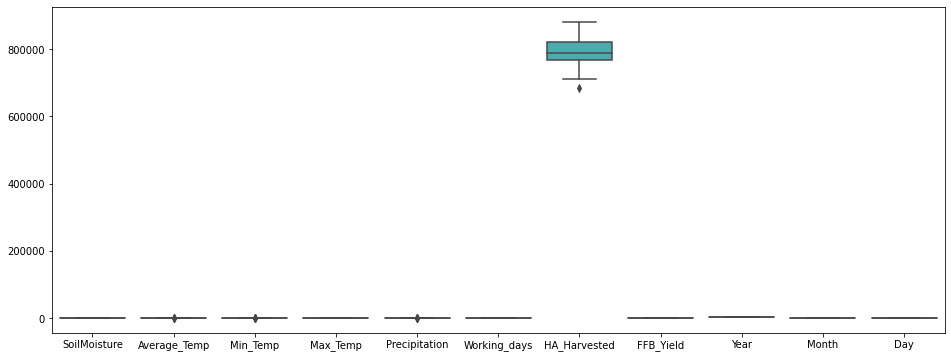

In [75]:
plt.figure(figsize=(16, 6))
sns.boxplot(data = palmFFB)

Similar to the previous question there is a big difference between mean of HA_Harvested and the rest of the features. So we use the previous trick.

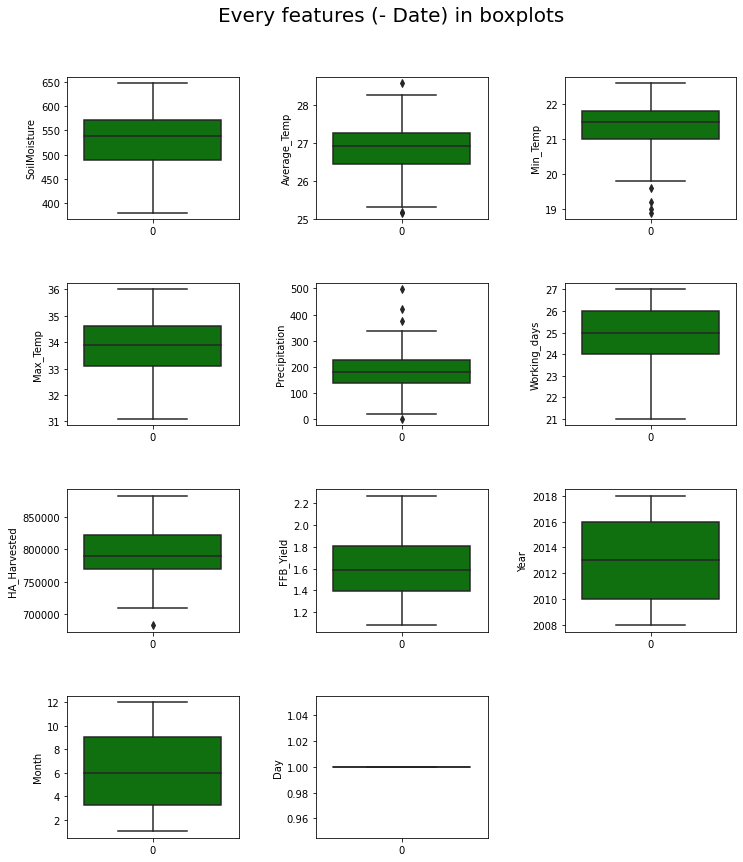

In [88]:
# Dates must be removed
palmFFB0 = palmFFB.drop(columns='Date')
# Showing each components in a separate boxplot for better understanding:
plt.figure(figsize=(12,14))
plt.subplots_adjust(hspace=0.45, wspace = 0.45)
plt.suptitle("Every features (- Date) in boxplots", fontsize=20, y = 0.95)
for i in range(len(palmFFB0.columns)):
    ax = plt.subplot(4,3,i+1)
    sns.boxplot(data = palmFFB0[str(palmFFB0.columns[i])], color = "g")
    plt.ylabel(str(palmFFB0.columns[i]))

<AxesSubplot:xlabel='Year', ylabel='FFB_Yield'>

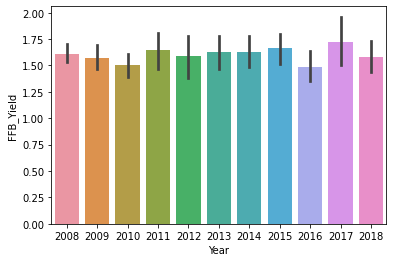

In [89]:
# Is there any relationship between the years and FFB yield?
sns.barplot(x = palmFFB['Year'], y = palmFFB['FFB_Yield'] )

It is possible to realize that based on the graph above, the year 2017 we have the highest FFB_Yield and in 2016 the lowest.

<AxesSubplot:xlabel='Month', ylabel='FFB_Yield'>

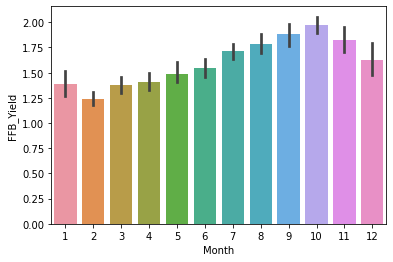

In [90]:
# Is there any relationship between the month of the year and FFB_Yield?
sns.barplot(x = palmFFB['Month'], y = palmFFB['FFB_Yield'] )

The moneth of October has the highest FFB_Yield. Also the scond half of the year has the higher FFB Yield than the first half.

<AxesSubplot:xlabel='Working_days', ylabel='FFB_Yield'>

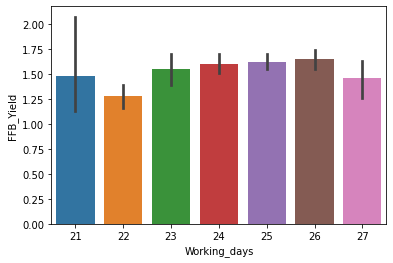

In [92]:
# Is there any relationship between the working days and FFB Yield?
sns.barplot(x = palmFFB['Working_days'], y = palmFFB['FFB_Yield'] )

FFB Yield is not the highest during 25 working day meaning that there is no contribution on high FFB Yield.

<AxesSubplot:xlabel='Working_days', ylabel='HA_Harvested'>

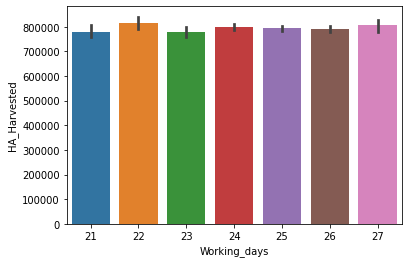

In [95]:
# What about the relationship between HA_Harvet and Working_Days?
sns.barplot(x = palmFFB['Working_days'], y = palmFFB['HA_Harvested'] )

HA_Harvested is similar across all working days.

# Selecting key features impacting on FFB Yield 

There are feature selection methods in machine learning which help us to decise key features

<ins>Here we are dealing with Supervised Learning problem (our outputs are FFB_Yield) thus, we are going to choose a method related to supervised learning.</ins>

#### Here a common approach would be Random Forest but Beside Random Forest we are going to use an intrinsic method (Lasso)

## Random Forest

For both methods we are going to separate out input and output

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Spliting the data into features & target

FFBnoDate = palmFFB.drop(columns=['Date'])
x = FFBnoDate.drop(columns=['FFB_Yield'])
y = FFBnoDate['FFB_Yield']


Now we need to separate out train and test
also we are going to add a cross validation section

In [122]:
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state=101, test_size=0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,random_state=101, test_size=0.20)

Let's create a Random Forest Regressor using sklearn

Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees. 

In [123]:
from sklearn.ensemble import RandomForestRegressor

In [168]:
RFR = RandomForestRegressor(max_depth = None, min_samples_leaf=9, min_samples_split=9, n_estimators = 50, random_state = 101)
RandomForest = RFR.fit(X_train,y_train)

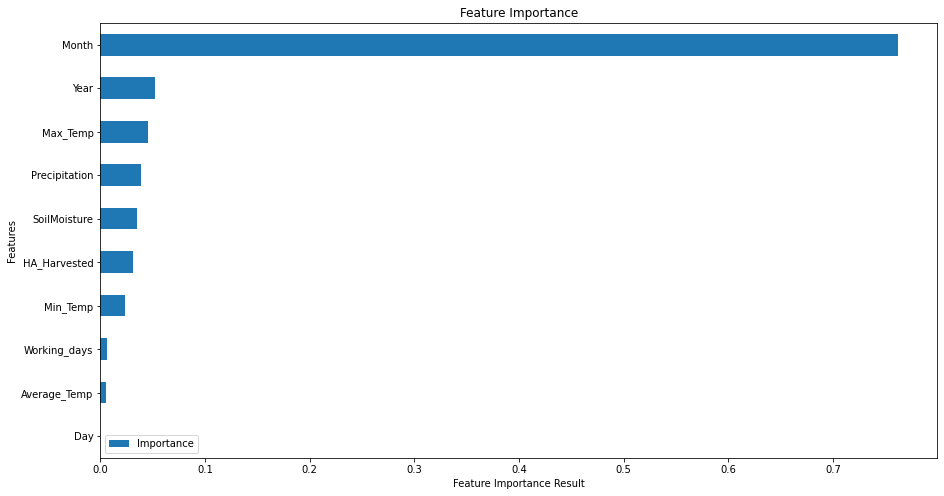

Mean Absolute Error: 0.11925229794268889
Mean Squared Error: 0.02149632217067348
Root Mean Squared Error: 0.14661624115586064


In [169]:
def RFPlot(RandomForest, X_val, y_val):
    prediction = RandomForest.predict(X_val)
    FeatureImportance = pd.DataFrame({'Importance':RandomForest.feature_importances_})    
    FeatureImportance['Features'] = X_train.columns
    FeatureImportance.sort_values(by='Importance', ascending=False, inplace=True)
    FeatureImportance = FeatureImportance.iloc[:X_train.shape[1]]
    # The “iloc()” function enables us to select a particular cell 
    # of the dataset, that is, it helps us select a value that belongs 
    # to a particular row or column from a set of values of a data frame or dataset.
    
    FeatureImportance.sort_values(by='Importance', inplace=True)
    FeatureImportance = FeatureImportance.set_index('Features', drop=True)
    FeatureImportance.plot.barh(title='Feature Importance', figsize=(15,8))
    plt.xlabel('Feature Importance Result')
    plt.show()
    
    from sklearn import metrics
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_val, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, prediction)))
RFPlot(RandomForest, X_val, y_val)

## Lasso

The “LASSO” stands for Least Absolute Shrinkage and Selection Operator. Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction.

This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. Lasso Regression uses L1 regularization technique. It is used when we have more number of features because it automatically performs feature selection.

In [126]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.linear_model import  LassoCV

In [127]:
lasso_model = Lasso().fit(X_train,y_train)

Let's check the coefficient given to each features:

In [128]:
lasso_model.coef_

array([-1.06817116e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        9.22293257e-04,  0.00000000e+00, -2.71006992e-06,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

Now let’s make the model prediction under normal conditions without specifying any parameters.

In [132]:
print(lasso_model.predict(X_train)[:5])
print(np.array(y_train[:5]))

[1.88992546 1.68457365 1.48081591 1.49584071 1.47508077]
[1.81 1.47 1.32 1.48 1.39]


checking the RMSE using the validation data

In [137]:
from sklearn import metrics
y_pred = lasso_model.predict(X_val)
print("Root Mean Squared Error: " , np.sqrt(metrics.mean_squared_error(y_val,y_pred)))

Root Mean Squared Error:  0.21031303025889161


## R_squared

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that’s explained by an independent variable or variables in a regression model. 

Whereas correlation explains the strength of the relationship between an independent and dependent variable, R-squared explains to what extent the variance of one variable explains the variance of the second variable. So, if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model’s inputs.

In [138]:
r2_score(y_val, y_pred)

0.3375988984761147

Apprximately 33% of the observed variation can be explaiend by the model's input.

#### Model Tuning:

the coefficients in Lasso regression may vary according to the determined alpha parameter. 

Now it is important to tune the alpha to find the optimum lambda (the amount of shrinkage) 

In [165]:
lasso_cv_model = LassoCV(alphas = np.random.randint(0,10,1), cv = 21, max_iter = 100000).fit(X_val,y_val)
# using all the validation values for tuning hyperparameters

Using LassoCV we are going to Tune Alpha and find the optimum lambda by assigning random values

In [160]:
lasso_cv_model.alpha_

0

Our Tuned Alpha is 66

In [161]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train,y_train)

y_pred_tuned = lasso_tuned.predict(X_test)

print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred_tuned)))

Root Mean Squared Error:  0.18131994442597826


Now let's check what features were used in the regression algorithm (The features with coefficients other than 0)

In [162]:
lasso_tuned.coef_

array([-1.37303065e-03, -1.24673780e-01, -1.55237723e-02,  3.74472832e-02,
        3.23927872e-04,  2.86639940e-02,  4.25749107e-07,  8.98016817e-03,
        5.86444480e-02,  0.00000000e+00])

In [163]:
pd.Series(lasso_tuned.coef_, index = X_train.columns )

SoilMoisture    -1.373031e-03
Average_Temp    -1.246738e-01
Min_Temp        -1.552377e-02
Max_Temp         3.744728e-02
Precipitation    3.239279e-04
Working_days     2.866399e-02
HA_Harvested     4.257491e-07
Year             8.980168e-03
Month            5.864445e-02
Day              0.000000e+00
dtype: float64

Text(0, 0.5, 'FFB Yield Value')

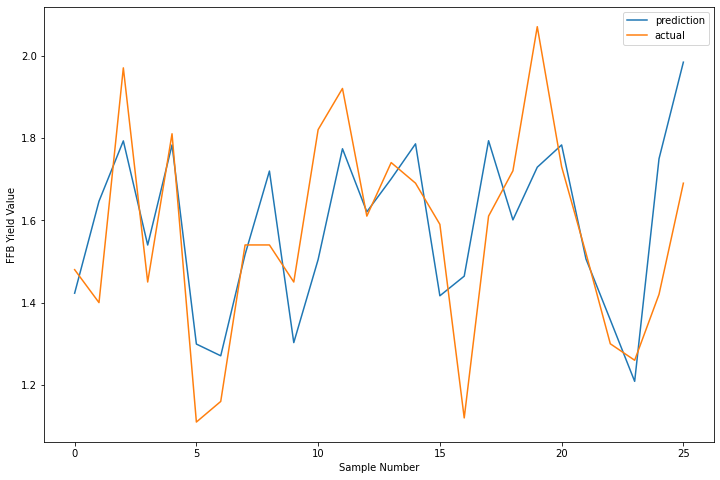

In [170]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(0,26),y_pred_tuned)
plt.plot(np.arange(0,26),y_test)
plt.legend(['prediction','actual'])
plt.xlabel('Sample Number')
plt.ylabel('FFB Yield Value')